In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

In [2]:
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Statsmodels version:',statsmodels.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Seaborn version: 0.11.0
Matplotlib version: 3.3.2
Statsmodels version: 0.12.0


In [3]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [5]:
df['Time_Stamp']=pd.to_datetime(df['YearMonth'])
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-01
1,1980-02,118.0,1980-02-01
2,1980-03,129.0,1980-03-01
3,1980-04,99.0,1980-04-01
4,1980-05,116.0,1980-05-01


In [6]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-01,1980-01,112.0
1980-02-01,1980-02,118.0
1980-03-01,1980-03,129.0
1980-04-01,1980-04,99.0
1980-05-01,1980-05,116.0


In [7]:
df.drop('YearMonth',axis=1,inplace =True)

In [8]:
df.head()

,Rose
Time_Stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [9]:
df.tail()

,Rose
Time_Stamp,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


# 1. Plot the Time series data

In [10]:
from pylab import rcParams

<AxesSubplot:xlabel='Time_Stamp'>

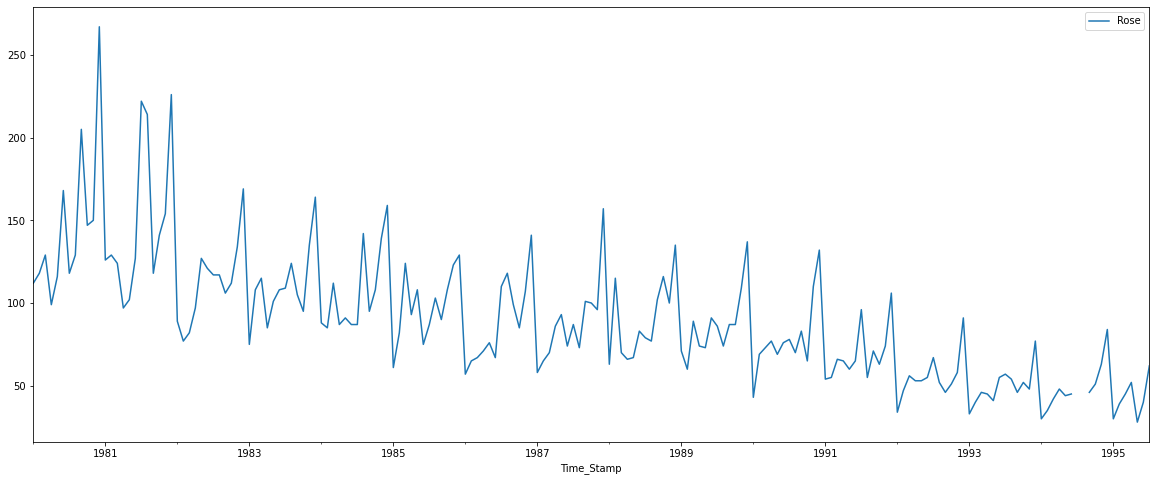

In [11]:
rcParams['figure.figsize'] = 20,8
df.plot()

# 2. Perform appropriate Exploratory Data Analysis to understand the data

In [12]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


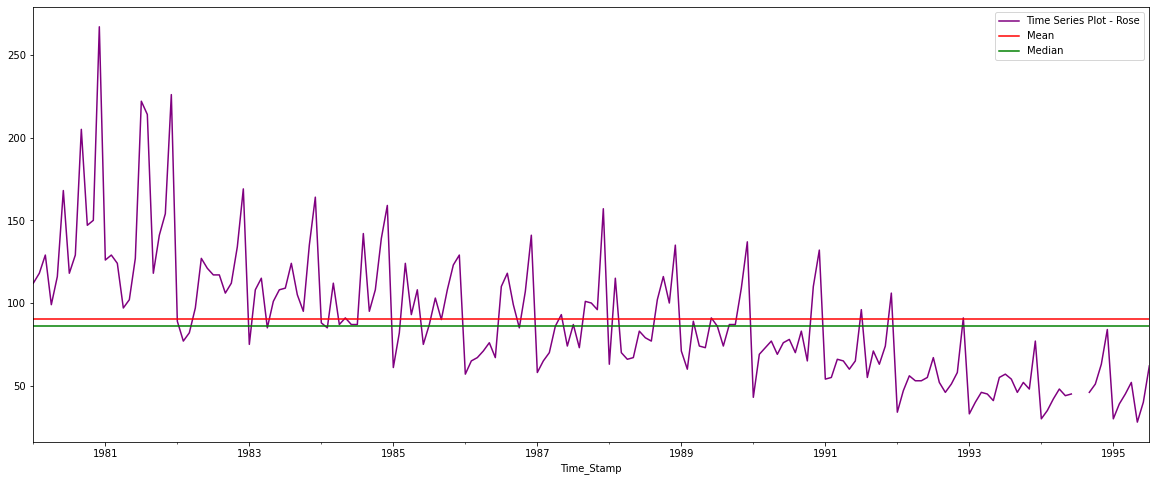

In [13]:
rcParams['figure.figsize'] = 20,8
df.plot(color='Purple')
plt.grid();
plt.axhline(df['Rose'].mean(),color='Red')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot - Rose','Mean','Median']);

# Plot a year on year boxplot for the Rose Wine Sales

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


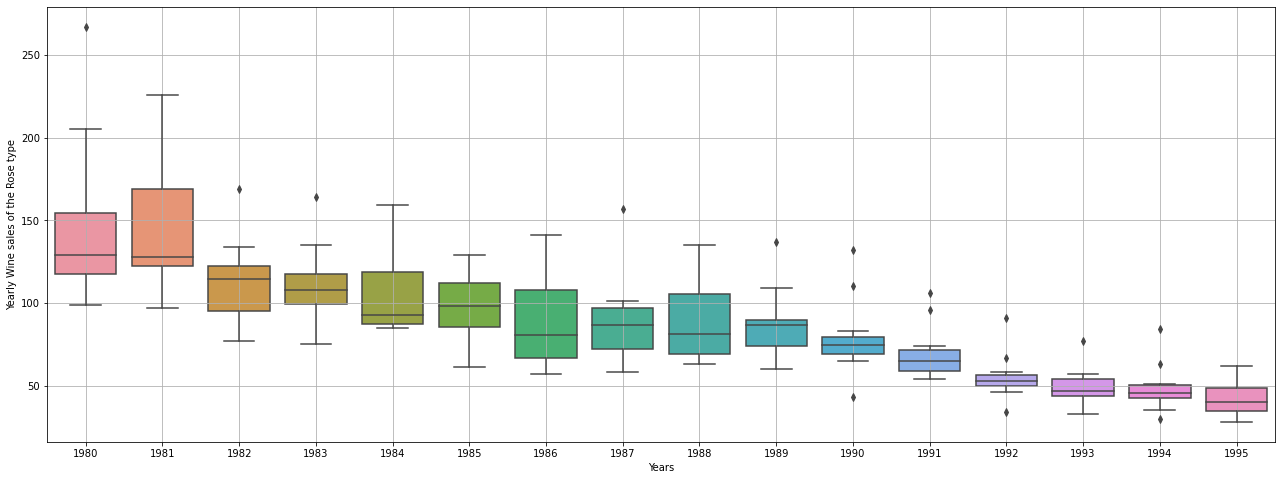

In [14]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df.index.year, df.Rose, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine sales of the Rose type');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the production of beer has some outliers for certain years

# Plot a quarterly comparison of the Rose Wine Sales using a barplot.

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


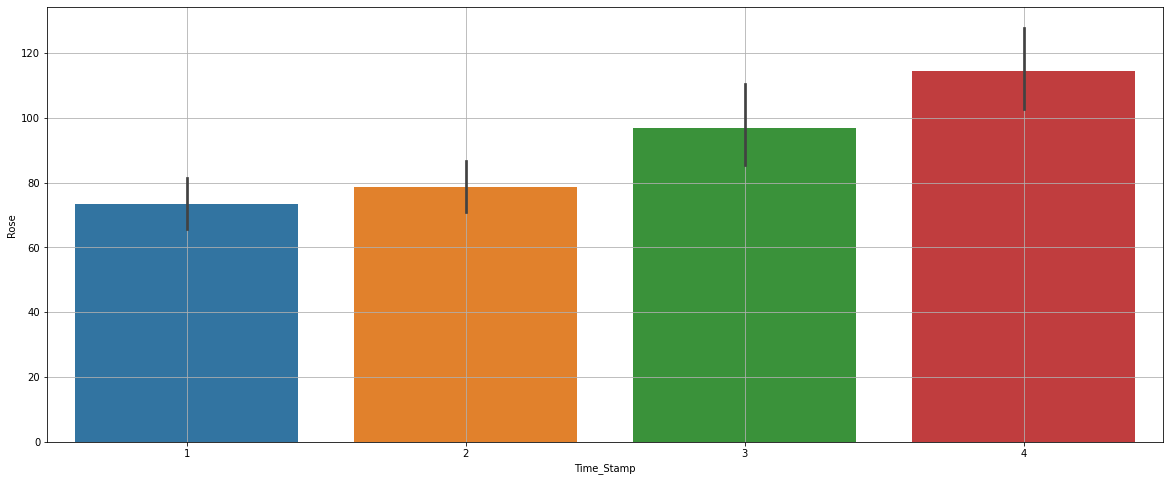

In [15]:
sns.barplot(df.index.quarter,df.Rose,data=df)
plt.grid();

# Plot a monthly boxplot for the wine sales taking all the years into account.

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


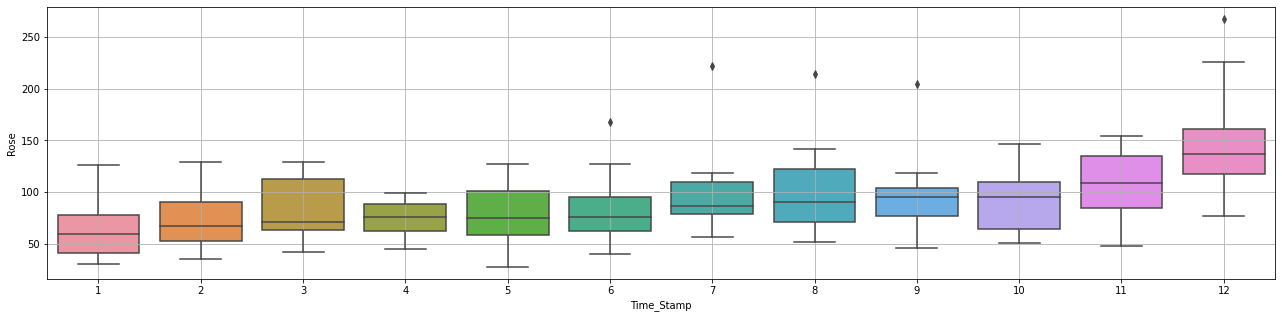

In [16]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df.index.month, df.Rose, ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years show the presence of outliers.

# Plot a monthplot of the give Time Series

C:\Users\kpriyadh\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\kpriyadh\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


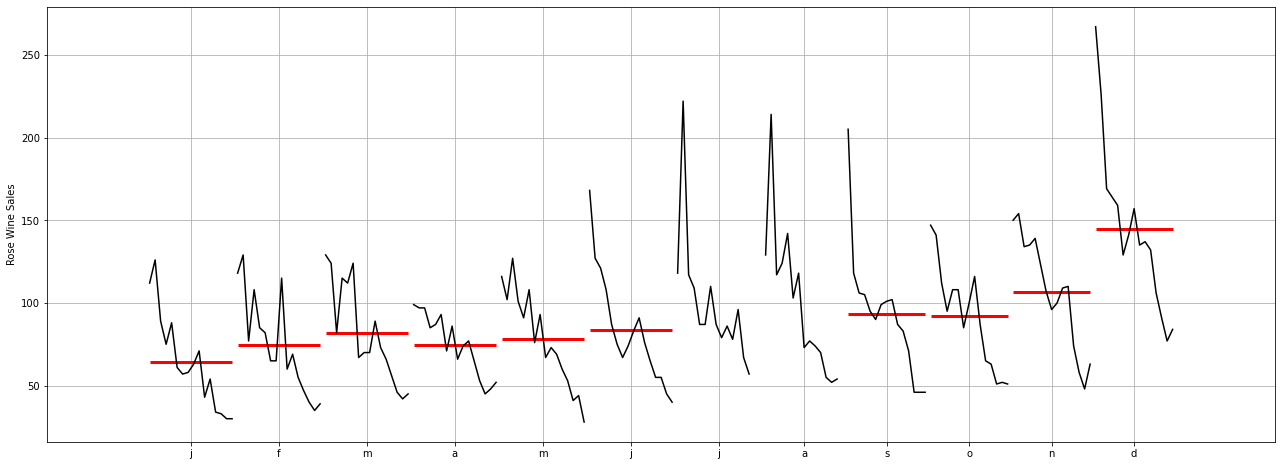

In [17]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Rose Wine Sales',ax=ax)
plt.grid();

# Plot of yearly_sales_across_months

In [18]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Rose', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


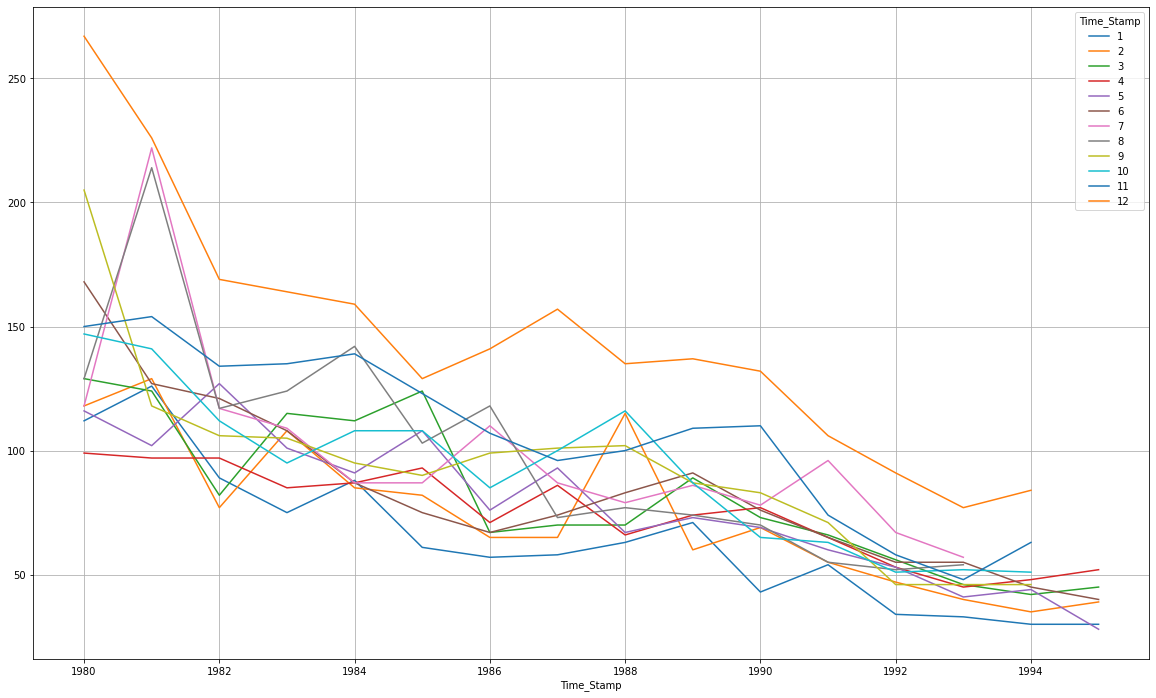

In [19]:
fig, ax = plt.subplots(figsize=(20,12))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Compare the Time Series plot by converting this monthly data into a quarterly and yearly format

### Yearly Plot

In [20]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


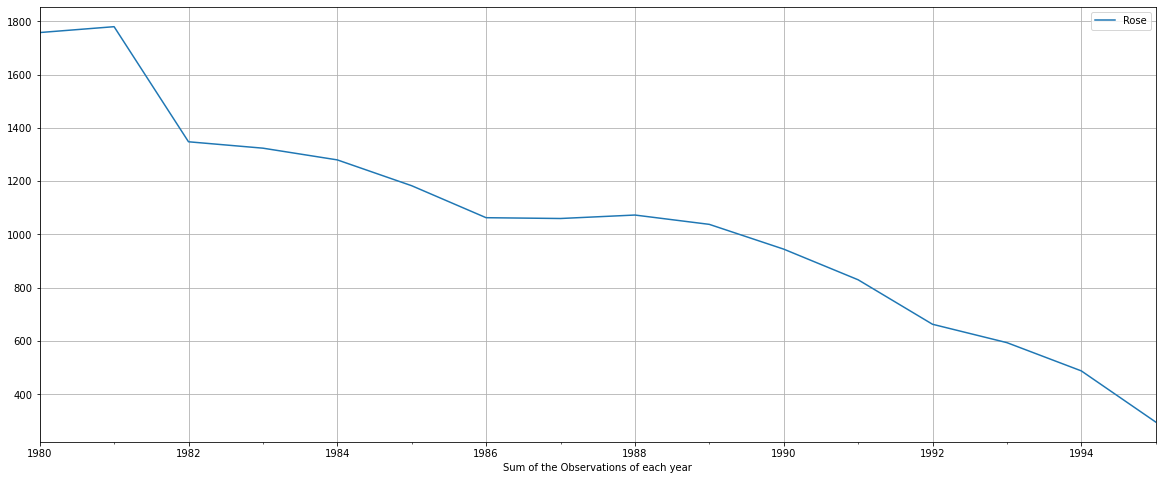

In [21]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

# Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [22]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

,Rose
Time_Stamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


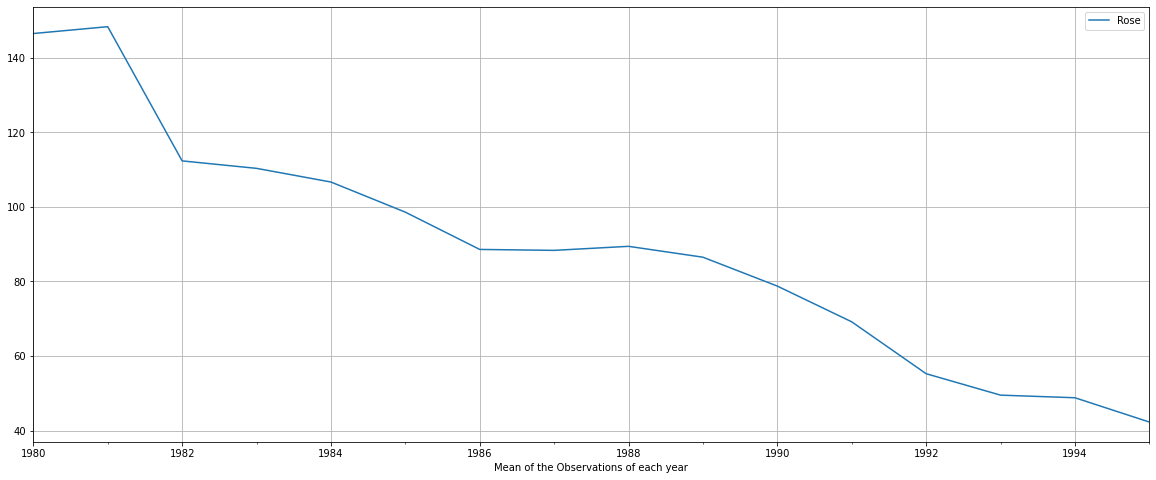

In [23]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

### Quarterly Plot

In [24]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

,Rose
Time_Stamp,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


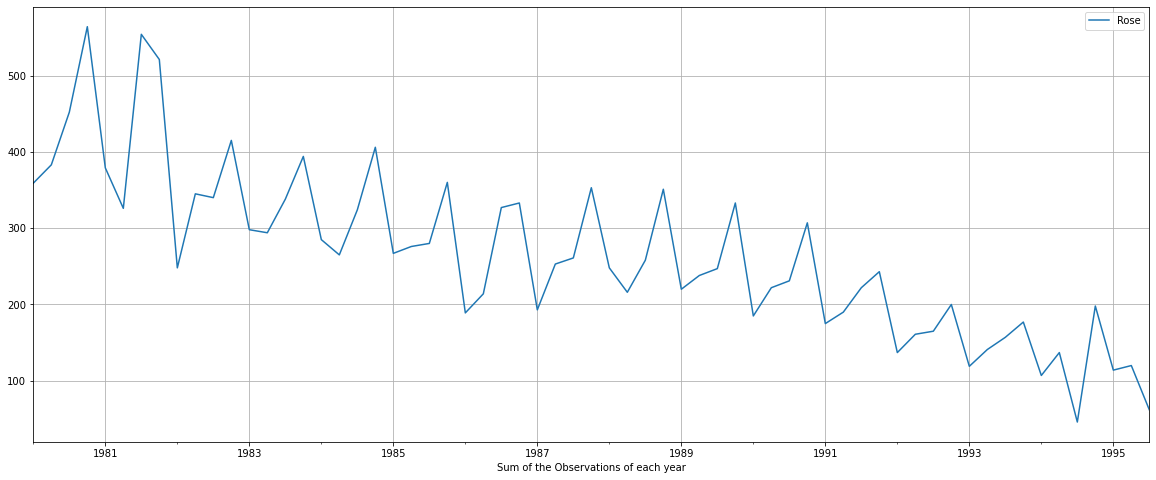

In [25]:
df_quarterly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [26]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

,Rose
Time_Stamp,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


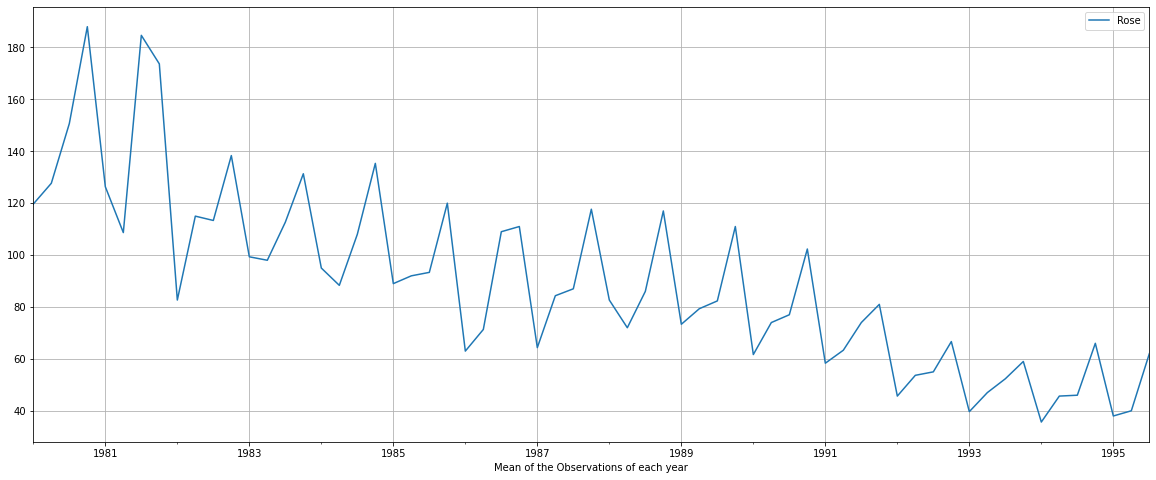

In [27]:
df_quarterly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

# Missing value

In [28]:
df.isna().sum()

Rose    2
dtype: int64

In [29]:
df.isnull().tail(13)

,Rose
Time_Stamp,
1994-07-01,True
1994-08-01,True
1994-09-01,False
1994-10-01,False
1994-11-01,False
1994-12-01,False
1995-01-01,False
1995-02-01,False
1995-03-01,False


In [30]:
df.interpolate(method='linear')['1994'].tail(15)

,Rose
Time_Stamp,
1994-01-01,30.000000
1994-02-01,35.000000
1994-03-01,42.000000
1994-04-01,48.000000
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,45.333333
1994-08-01,45.666667
1994-09-01,46.000000


In [31]:
df['1994']= df.interpolate(method='spline',order=1)['1994'].tail(15)


# Decompose the Time Series

### Additive Model

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

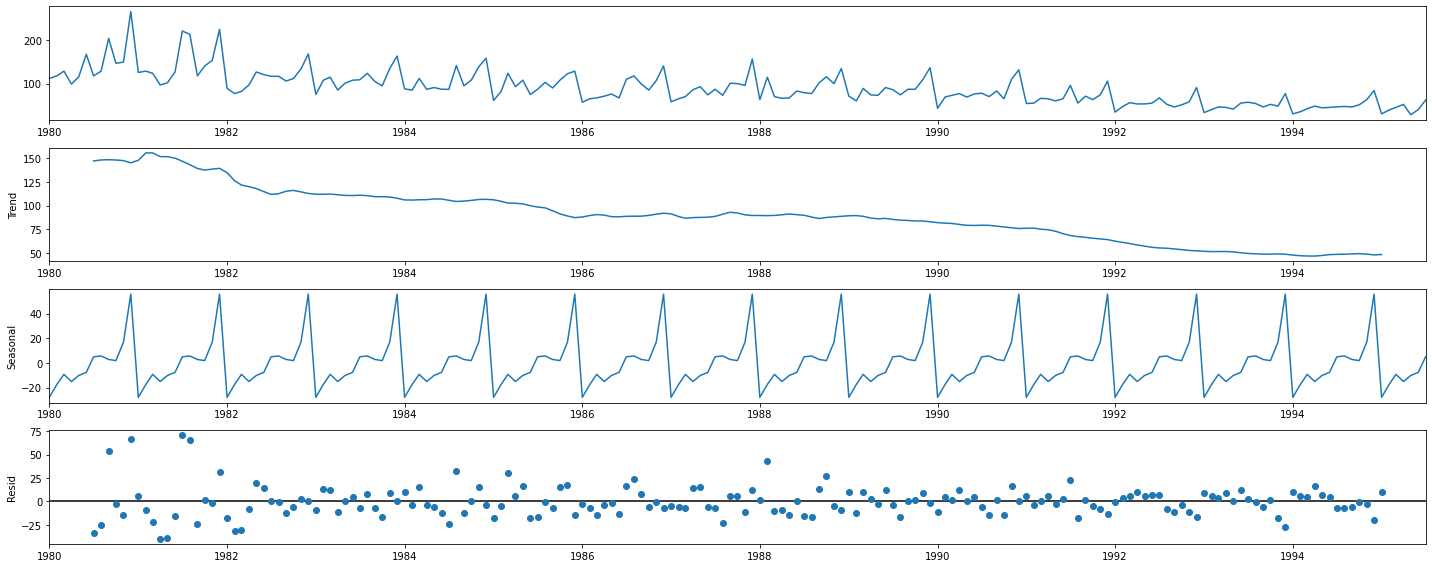

In [33]:
decomposition = seasonal_decompose(df)
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced seasonality in the data. As far as trend is concerned there is a steady increase in the sales where it reached a peak and the sales got saturated. 

### Multiplicative Model

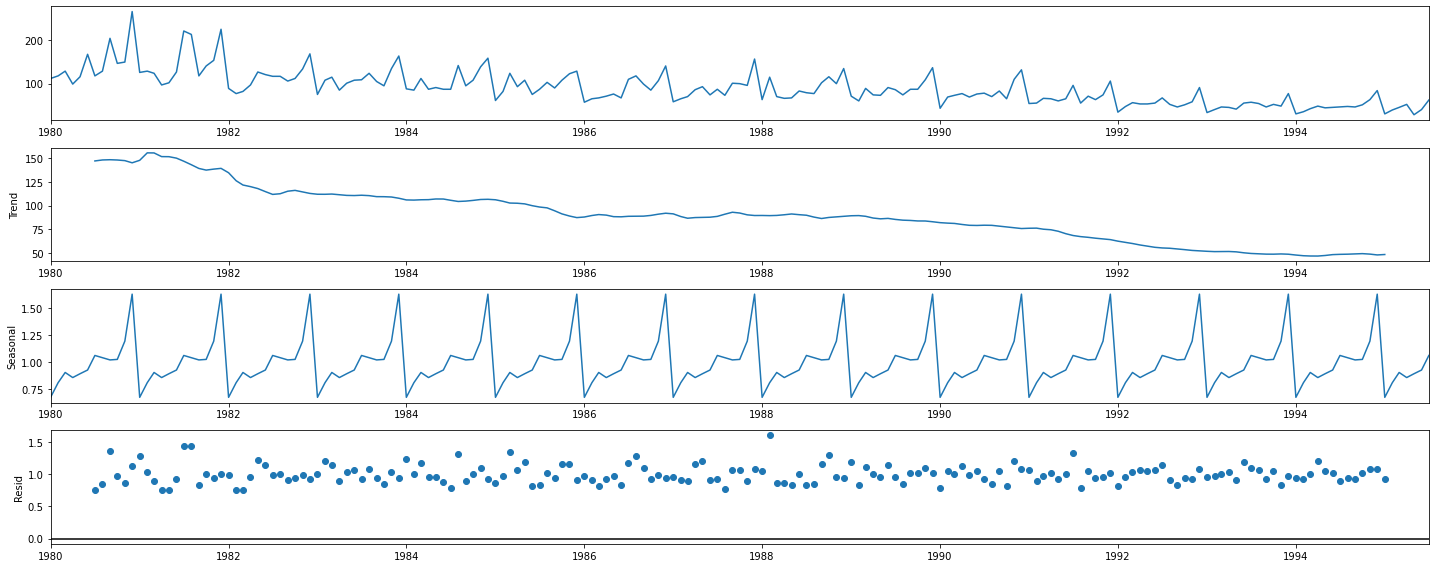

In [34]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

Multiplicative model is able to hande the residues well compared to the additive model. 

In [35]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [36]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-01    0.669946
1980-02-01    0.806019
1980-03-01    0.900899
1980-04-01    0.853719
1980-05-01    0.889143
1980-06-01    0.923718
1980-07-01    1.058920
1980-08-01    1.037754
1980-09-01    1.017402
1980-10-01    1.022303
1980-11-01    1.192007
1980-12-01    1.628173
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.757627
1980-08-01    0.839203
1980-09-01    1.358003
1980-10-01    0.971028
1980-11-01    0.853623
1980-12-01    1.129974
Name: resid, dtype:

In [37]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.840960
1980-08-01    148.964203
1980-09-01    149.733003
1980-10-01    149.054361
1980-11-01    148.270290
1980-12-01    146.254974
dtype: float64

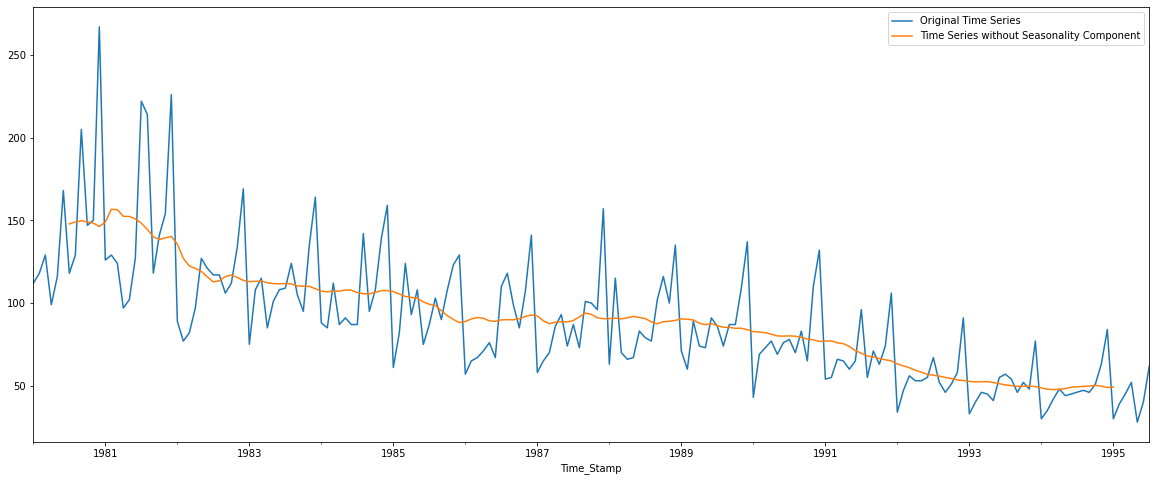

In [38]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

<AxesSubplot:>

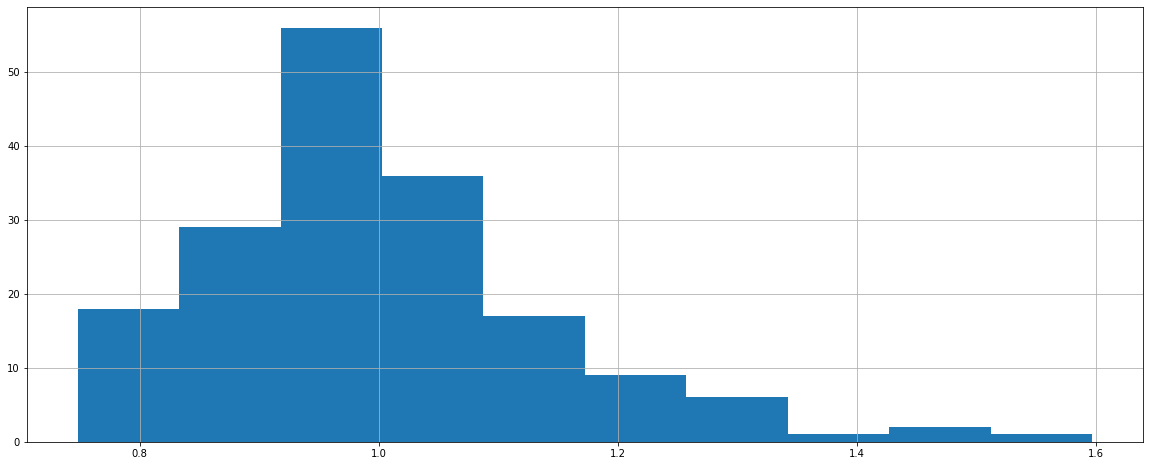

In [39]:
residual.hist()

# Missing value

In [40]:
df.isna().sum()

Rose    0
dtype: int64

# Split the data into training and test. The test data should start in 1991.

In [41]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [42]:
from IPython.display import display

In [43]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


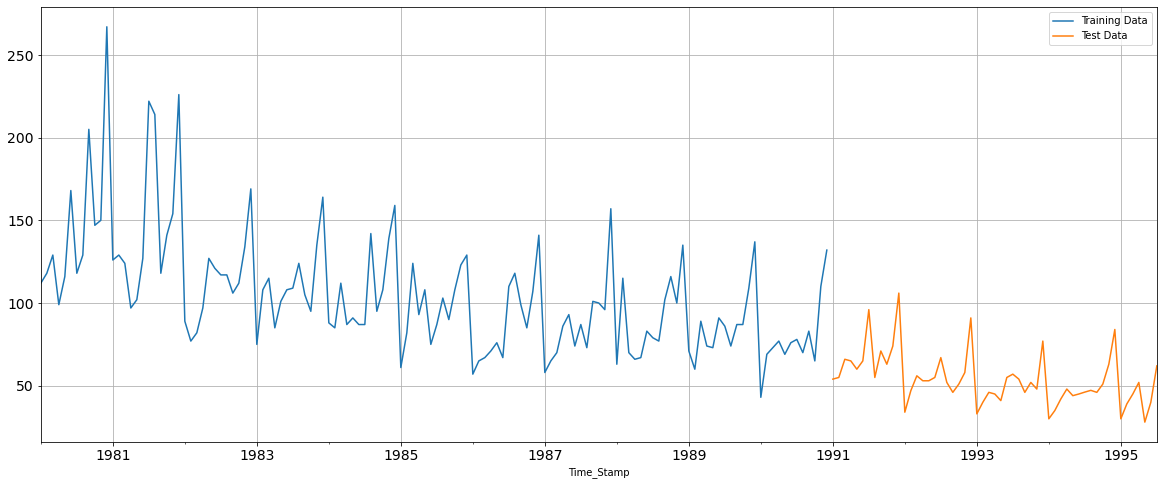

In [44]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building various exponential smoothing models on the training data

### Simple Exponential Smoothing with additive errors

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).

This method is suitable for forecasting data with no clear trend or seasonal pattern.

Parameter  𝛼  is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [45]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [46]:
SES_train = train.copy()
SES_test = test.copy()

In [47]:
# create class
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated')

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [48]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [49]:
print('')
print('== SIMPLE Exponential Smoothing Estimated Parameters ==')
print('')
model_SES_autofit.params


== SIMPLE Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has not optimized the smoothing level and alpha (smoothing level) is negligible (0.09)

In [50]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

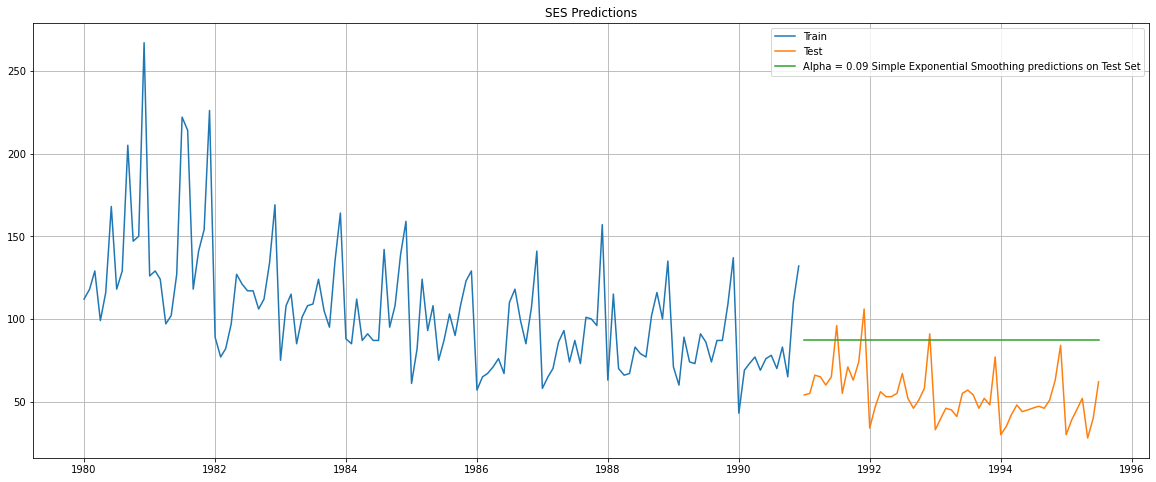

In [51]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label= 'Alpha = 0.09 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');

# Evaluate the SES model using RMSE on the test data

In [52]:
SES_RMSE=mean_squared_error(SES_test.values,SES_predict.values,squared=False)
print('SES RMSE VALUE',SES_RMSE)

SES RMSE VALUE 36.74840201882501


In [53]:
resultsDf = pd.DataFrame({'Test RMSE': [SES_RMSE]},index=['Alpha = 0.09 SES'])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402


# Holt - ETS(A, A, N) - Holt's linear method with additive errors

Double Exponential Smoothing
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.

In [54]:
DES_train = train.copy()
DES_test = test.copy()

In [55]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(optimized=True,use_brute=True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
model_DES.params


==Holt model Exponential Smoothing Estimated Parameters ==



C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.6610391146660035e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81553690867275,
 'initial_trend': -0.4943781897068274,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

Text(0.5, 1.0, 'Simple and Double Exponential Smoothing Predictions')

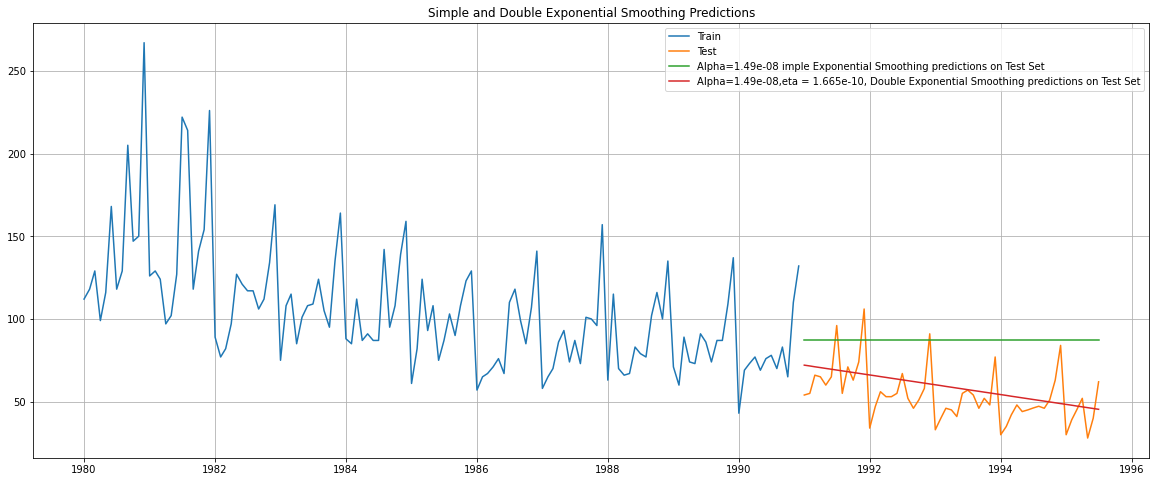

In [57]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1.49e-08 imple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,eta = 1.665e-10, Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')

We see that the double exponential smoothing is picking up the trend component

# Evaluate the DES model using RMSE on the test data

In [58]:
DES_RMSE=mean_squared_error(DES_test.values,DES_predict.values,squared=False)
print('DES RMSE VALUE',DES_RMSE)

DES RMSE VALUE 15.255480263531712


In [59]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [DES_RMSE]},index=['Alpha=1.49e-08,Beta = 1.665e-10 DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480


# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [60]:
TES_train = train.copy()
TES_test = test.copy()

In [61]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit(optimized=True,use_brute=True)

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES.params


==Holt Winters model Exponential Smoothing Estimated Parameters ==



C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.08872764725999983,
 'smoothing_trend': 9.006425383910208e-06,
 'smoothing_seasonal': 0.00030220468692033857,
 'damping_trend': nan,
 'initial_level': 146.86313344217183,
 'initial_trend': -0.54920783338383,
 'initial_seasons': array([-31.29615978, -18.85729122, -10.84129035, -21.39327001,
        -12.61174453,  -7.17892692,   2.72463253,   8.78522404,
          4.87498352,   3.01144155,  21.09509348,  63.26062685]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     42.493878
1991-02-01     54.383286
1991-03-01     61.850018
1991-04-01     50.748583
1991-05-01     58.981025
1991-06-01     63.864702
1991-07-01     73.219078
1991-08-01     78.730554
1991-09-01     74.270845
1991-10-01     71.857980
1991-11-01     89.392486
1991-12-01    131.011001
1992-01-01     35.903382
1992-02-01     47.792789
1992-03-01     55.259522
1992-04-01     44.158086
1992-05-01     52.390528
1992-06-01     57.274205
1992-07-01     66.628582
1992-08-01     72.140058
1992-09-01     67.680349
1992-10-01     65.267484
1992-11-01     82.801990
1992-12-01    124.420505
1993-01-01     29.312885
1993-02-01     41.202293
1993-03-01     48.669026
1993-04-01     37.567590
1993-05-01     45.800032
1993-06-01     50.683709
1993-07-01     60.038085
1993-08-01     65.549561
1993-09-01     61.089852
1993-10-01     58.676987
1993-11-01     76.211493
1993-12-01    117.830009
1994-01-01     22.722389
1994-02-01     34.611797
1994-03-01     42.078529
1994-04-01     30.977093


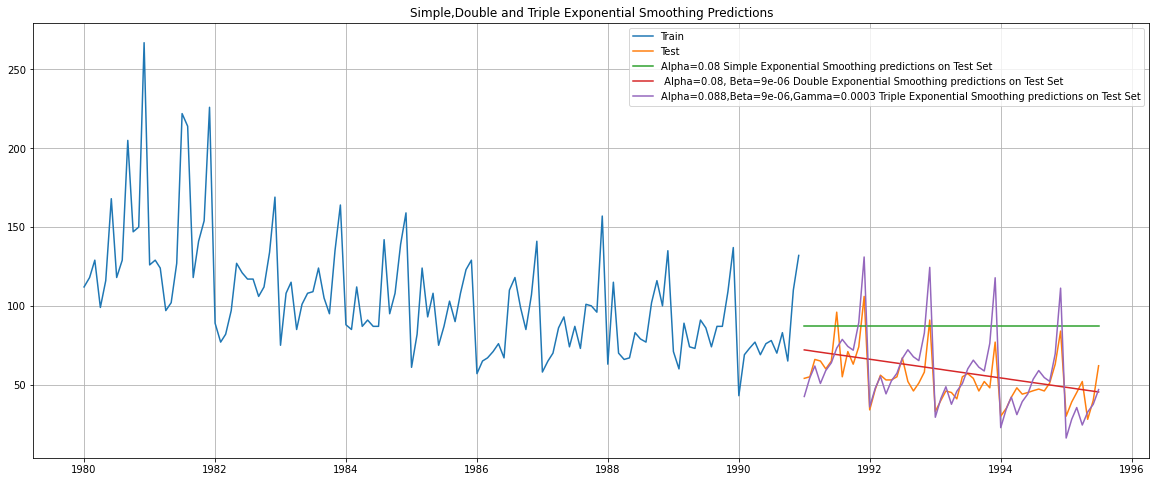

In [63]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.08 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label=' Alpha=0.08, Beta=9e-06 Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.088,Beta=9e-06,Gamma=0.0003 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

# Evaluate the TES model using RMSE on the test data

In [64]:
TES_RMSE=mean_squared_error(TES_test.values,TES_predict.values,squared=False)
print('TES RMSE VALUE',TES_RMSE)

TES RMSE VALUE 14.222849702739433


In [65]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE]},index=['Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850


### INFERENCE

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method with 'multiplicative'errors

In [66]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(TES_train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit(optimized=True,use_brute=True)

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters with multiplicative errors ==')
print('')
model_TES_am.params


==Holt Winters model Exponential Smoothing Estimated Parameters with multiplicative errors ==



C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.07580378115501289,
 'smoothing_trend': 0.04082731831671567,
 'smoothing_seasonal': 0.0008792861232047841,
 'damping_trend': nan,
 'initial_level': 163.87796236599962,
 'initial_trend': -0.9559811417358383,
 'initial_seasons': array([0.68432572, 0.77587329, 0.84828062, 0.74119702, 0.83386517,
        0.90761668, 0.99838676, 1.06374484, 1.00486364, 0.9847888 ,
        1.14803087, 1.58276201]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [67]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am



1991-01-01     56.036899
1991-02-01     63.349325
1991-03-01     69.021015
1991-04-01     60.120355
1991-05-01     67.380193
1991-06-01     73.053471
1991-07-01     80.089604
1991-08-01     85.028307
1991-09-01     80.074762
1991-10-01     78.207855
1991-11-01     90.863516
1991-12-01    124.781088
1992-01-01     53.763924
1992-02-01     60.771028
1992-03-01     66.202322
1992-04-01     57.656765
1992-05-01     64.609652
1992-06-01     70.039327
1992-07-01     76.773753
1992-08-01     81.495797
1992-09-01     76.736490
1992-10-01     74.936046
1992-11-01     87.048962
1992-12-01    119.524246
1993-01-01     51.490950
1993-02-01     58.192732
1993-03-01     63.383629
1993-04-01     55.193175
1993-05-01     61.839110
1993-06-01     67.025183
1993-07-01     73.457901
1993-08-01     77.963287
1993-09-01     73.398218
1993-10-01     71.664238
1993-11-01     83.234408
1993-12-01    114.267403
1994-01-01     49.217976
1994-02-01     55.614435
1994-03-01     60.564937
1994-04-01     52.729585


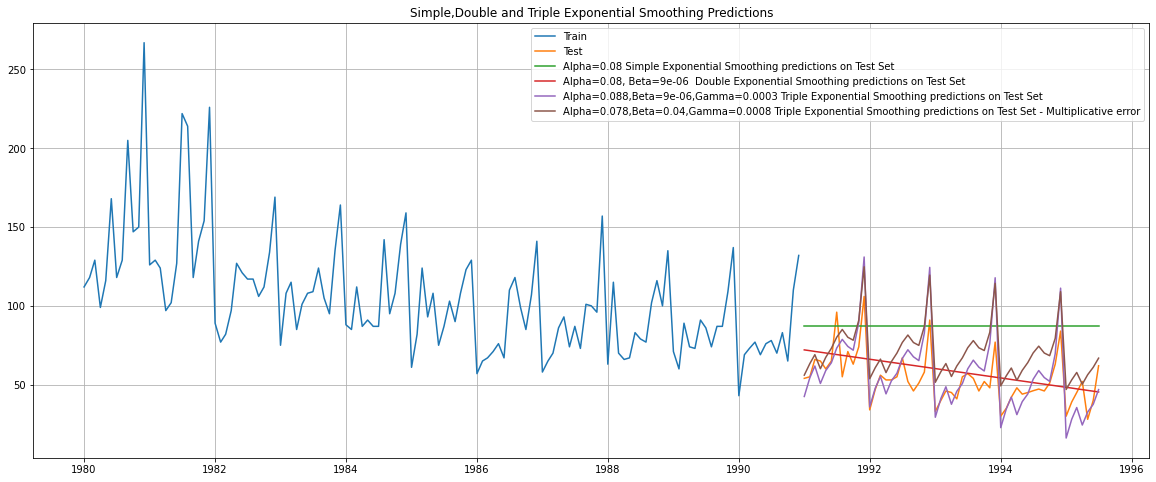

In [68]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.08 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.08, Beta=9e-06  Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.088,Beta=9e-06,Gamma=0.0003 Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.078,Beta=0.04,Gamma=0.0008 Triple Exponential Smoothing predictions on Test Set - Multiplicative error')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

# Evaluate the TES model with multiplicative error using RMSE on the test data

In [69]:
TES_RMSE_am=mean_squared_error(TES_test.values,TES_predict_am.values,squared=False)
print('TES_AM RMSE VALUE',TES_RMSE_am)

TES_AM RMSE VALUE 19.337755953259474


In [70]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [TES_RMSE_am]},index=['Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model

# Model 5:Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command

In [71]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [72]:
from sklearn import metrics
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [73]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
6,0.07,36.387162
7,0.08,36.414940
5,0.06,36.529472
8,0.09,36.556235
9,0.10,36.780184
...,...,...
94,0.95,78.486361
95,0.96,78.740557
96,0.97,78.986367
97,0.98,79.223691


In [74]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.07 Tuned SES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162


# Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [75]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [77]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)


In [78]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
343,0.04,0.47,14.455710
222,0.03,0.25,15.045815
223,0.03,0.26,15.181862
398,0.05,0.03,15.336442
262,0.03,0.65,15.339731
...,...,...,...
6731,0.68,0.99,1118.270892
7127,0.72,0.99,1118.406374
6830,0.69,0.99,1119.037976
7028,0.71,0.99,1119.121521


In [79]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.04,Beta=0.47 Tuned DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710


# Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [80]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

C:\Users\kpriyadh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [81]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [82]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
32,0.1,0.4,0.3,1.198617e+01
22,0.1,0.3,0.3,1.204283e+01
12,0.1,0.2,0.3,1.209416e+01
13,0.1,0.2,0.4,1.209463e+01
23,0.1,0.3,0.4,1.222683e+01
...,...,...,...,...
899,0.9,1.0,1.0,1.414321e+06
988,1.0,0.9,0.9,1.453467e+06
998,1.0,1.0,0.9,3.575054e+06
989,1.0,0.9,1.0,4.123859e+06


In [83]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168


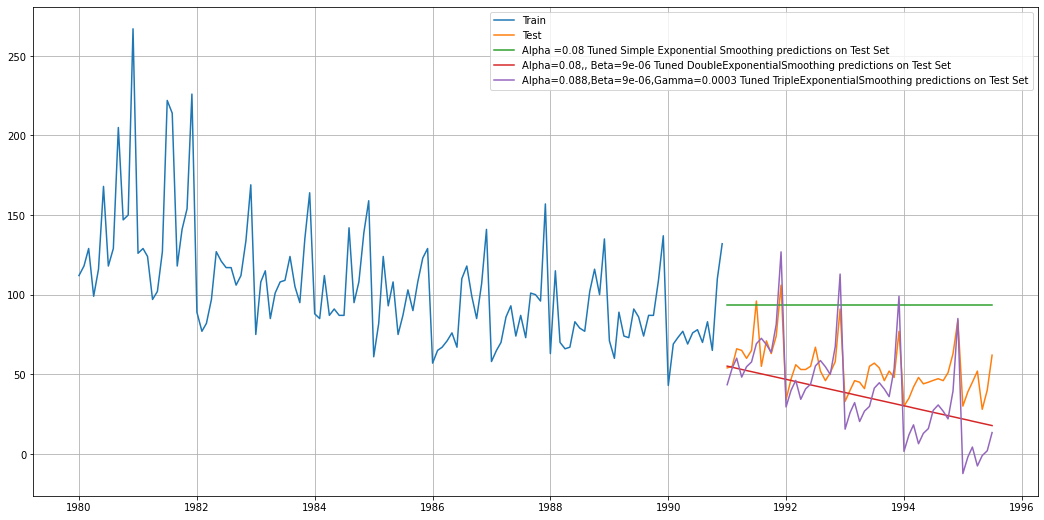

In [84]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python

plt.plot(SES_test['predict', 0.02], label='Alpha =0.08 Tuned Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.02, 0.38], label='Alpha=0.08,, Beta=9e-06 Tuned DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.1, 0.4, 0.1], label='Alpha=0.088,Beta=9e-06,Gamma=0.0003 Tuned TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

# Building different models and comparing the accuracy metrics

### Model 1: Linear Regression

In [85]:
train    =   df[0:int(len(df)*0.71)] 
test     =   df[int(len(df)*0.71):]

In [86]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [87]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [88]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [89]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [90]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
Time_Stamp,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


Last few rows of Training Data


,Rose,time
Time_Stamp,,
1990-08-01,70.0,128
1990-09-01,83.0,129
1990-10-01,65.0,130
1990-11-01,110.0,131
1990-12-01,132.0,132


First few rows of Test Data


,Rose,time
Time_Stamp,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


Last few rows of Test Data


,Rose,time
Time_Stamp,,
1995-03-01,45.0,183
1995-04-01,52.0,184
1995-05-01,28.0,185
1995-06-01,40.0,186
1995-07-01,62.0,187


Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()

In [93]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

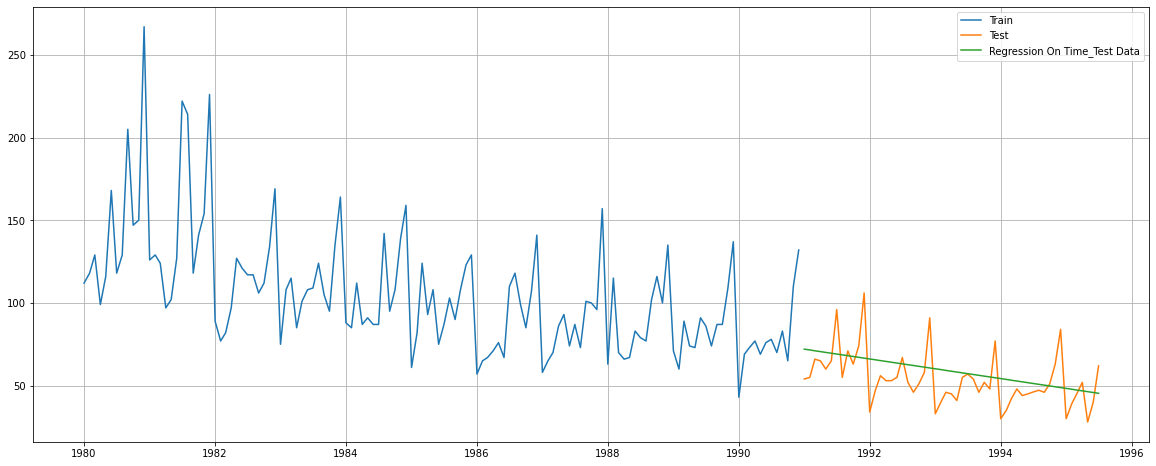

In [94]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Linear Regression Model Evaluation

In [95]:
rmse_Lin_Reg_model_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_Lin_Reg_model_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255 


In [96]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Lin_Reg_model_test]},index=['Linear RegressionOnTime'])

In [97]:
resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492


# Model 8: Naive Approach:  

In [98]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [99]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

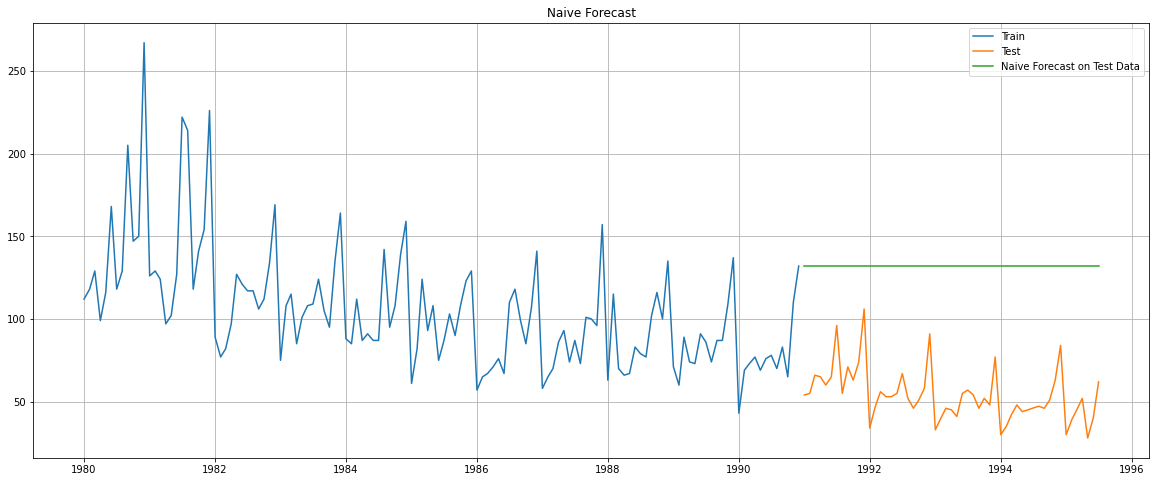

In [100]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [101]:
rmse_Naive_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive model forecast on the Test Data,  RMSE is %3.3f" %(rmse_Naive_test))

For Naive model forecast on the Test Data,  RMSE is 79.672


In [102]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Naive_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475


# Method 9: Simple Average

In [103]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [104]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


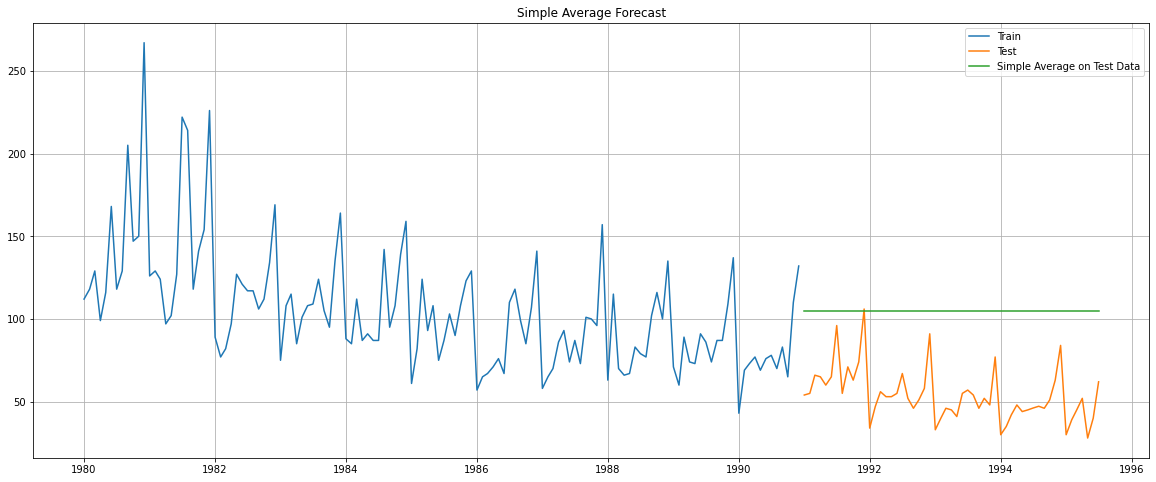

In [105]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Simple Average Model Evaluation

In [106]:
rmse_Sim_Avg_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_Sim_Avg_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [107]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Sim_Avg_test]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475
Simple Average Model,53.413298


# Method 10: Moving Average(MA)

In [108]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


### Trailing moving averages

In [109]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,NaN
1980-09-01,205.0,167.0,155.00,139.166667,132.666667


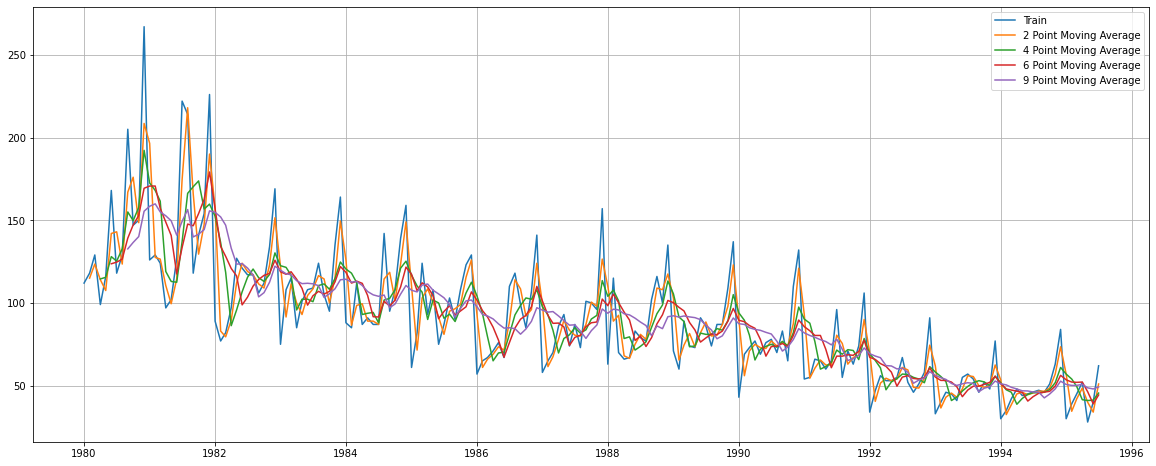

In [110]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [111]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [112]:
trailing_MovingAverage_train.head()
trailing_MovingAverage_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1991-01-01,54.0,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667


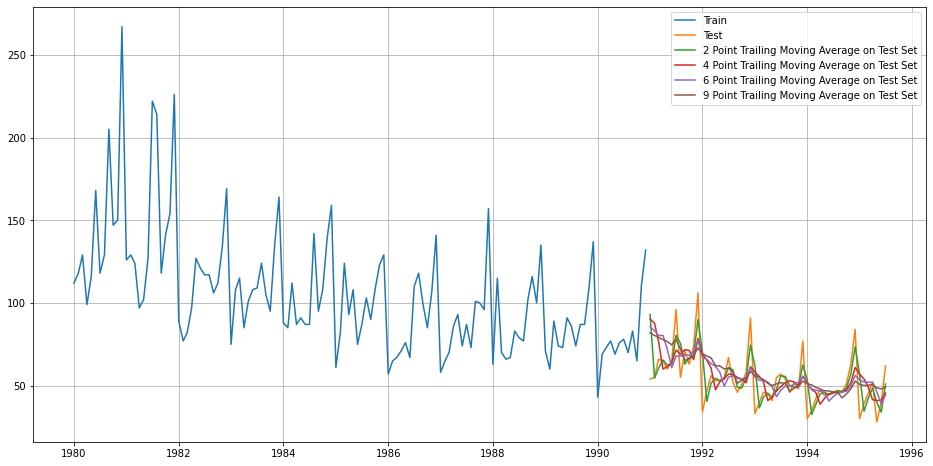

In [113]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation on the test data

In [114]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_Moving_Avg_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_Moving_Avg_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_Moving_Avg_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_Moving_Avg_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Moving_Avg_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.555
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.722


In [115]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_Moving_Avg_test_2,rmse_Moving_Avg_test_4
                                          ,rmse_Moving_Avg_test_6,rmse_Moving_Avg_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475
Simple Average Model,53.413298


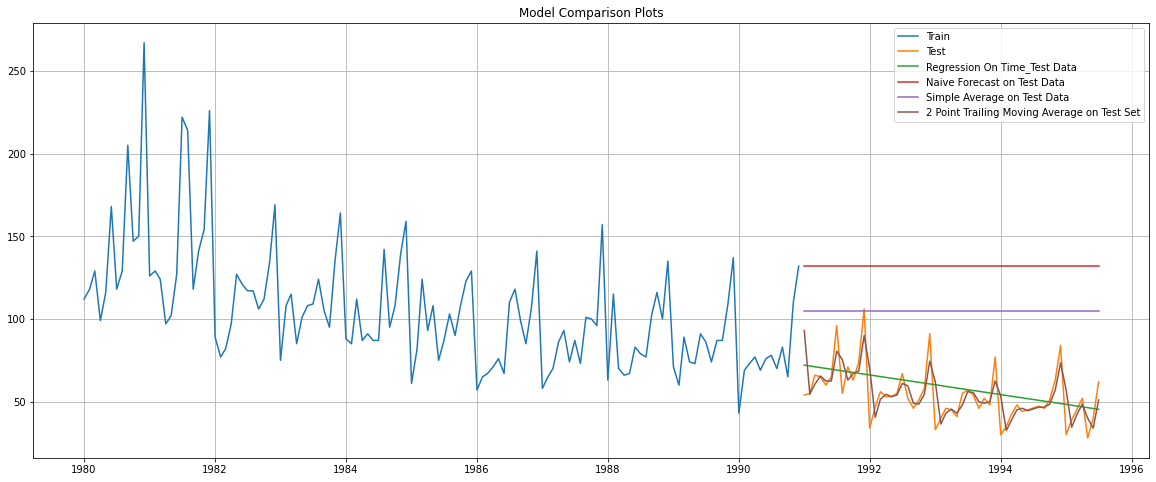

In [116]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# 5. Check for the stationarity of the Train data

In [117]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

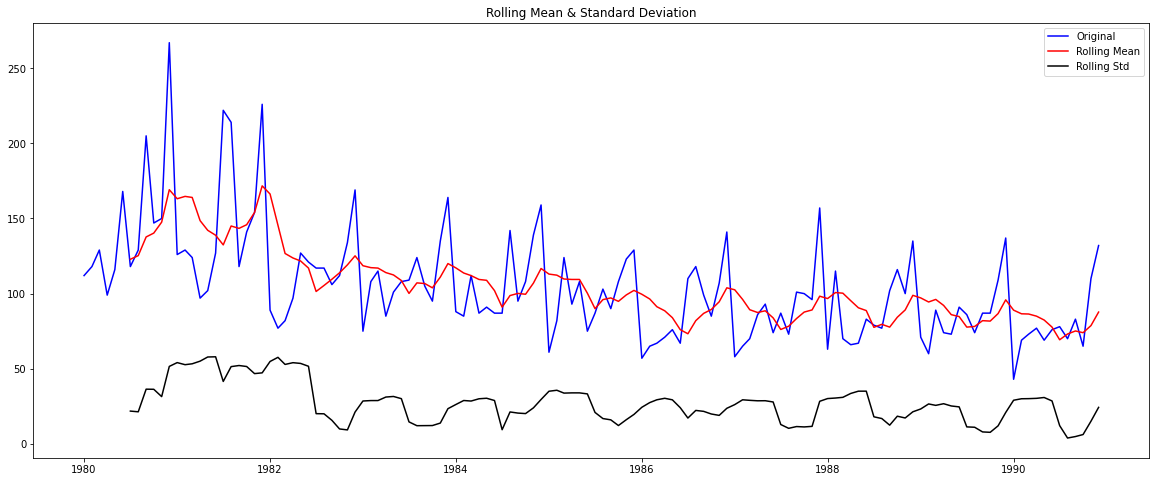

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [118]:
test_stationarity(train['Rose'])

We see that at 5% significant level the Time Series is non-stationary as'p' value is 0.6 which is greater than α  = 0.05. 

We need to use appropriate measures of differencing to stationarize the data

### Let us take a difference of order 1 and check whether the Time Series is stationary or not.

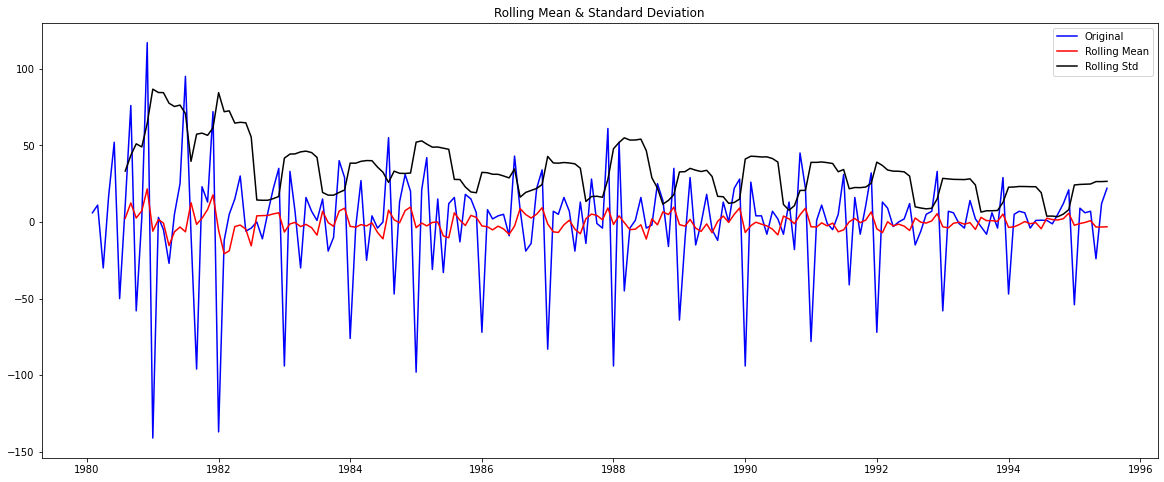

Results of Dickey-Fuller Test:
Test Statistic                -8.044819e+00
p-value                        1.806379e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [119]:
test_stationarity(df['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05

We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there.

In [120]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


# Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

As the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models.

In [121]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [122]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [123]:
import warnings 
warnings. filterwarnings('ignore') 

In [124]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train['Rose'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353734911866
ARIMA(1, 1, 0) - AIC:1319.3483105802602
ARIMA(1, 1, 1) - AIC:1277.7757532785026
ARIMA(1, 1, 2) - AIC:1277.359228683666
ARIMA(2, 1, 0) - AIC:1300.6092611744193
ARIMA(2, 1, 1) - AIC:1279.045689409317
ARIMA(2, 1, 2) - AIC:1279.298693936495


In [125]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)


,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359229
4,"(1, 1, 1)",1277.775753
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [126]:
## ARIMA(2,1,2) has the lowest AIC
mod = ARIMA(train['Rose'], order=(2,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 25 Jul 2021   AIC                           1279.299
Time:                        17:15:23   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [127]:
pred_ARIMA = results_Arima.forecast(steps=len(test))
pred_ARIMA[0]

array([79.42150355, 69.46569389, 71.72347768, 69.77311761, 69.99557893,
       69.15252127, 68.8349132 , 68.25834599, 67.80941128, 67.29757116,
       66.81673484, 66.32061787, 65.83203219, 65.33973461, 64.84926648,
       64.35789669, 63.86697129, 63.37582687, 62.88479039, 62.39370071,
       61.90263726, 61.41156088, 60.92049087, 60.42941772, 59.93834612,
       59.44727375, 58.95620176, 58.46512959, 57.97405751, 57.48298538,
       56.99191327, 56.50084116, 56.00976905, 55.51869693, 55.02762482,
       54.53655271, 54.0454806 , 53.55440848, 53.06333637, 52.57226426,
       52.08119214, 51.59012003, 51.09904792, 50.60797581, 50.11690369,
       49.62583158, 49.13475947, 48.64368735, 48.15261524, 47.66154313,
       47.17047101, 46.6793989 , 46.18832679, 45.69725468, 45.20618256])

### ARIMA Model Evaluation

In [128]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Rose,pred_ARIMA[0]))
print('RMSE of ARIMA model',rmse)

RMSE of ARIMA model 15.342048385136696


In [129]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(2, 1, 2)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475
Simple Average Model,53.413298


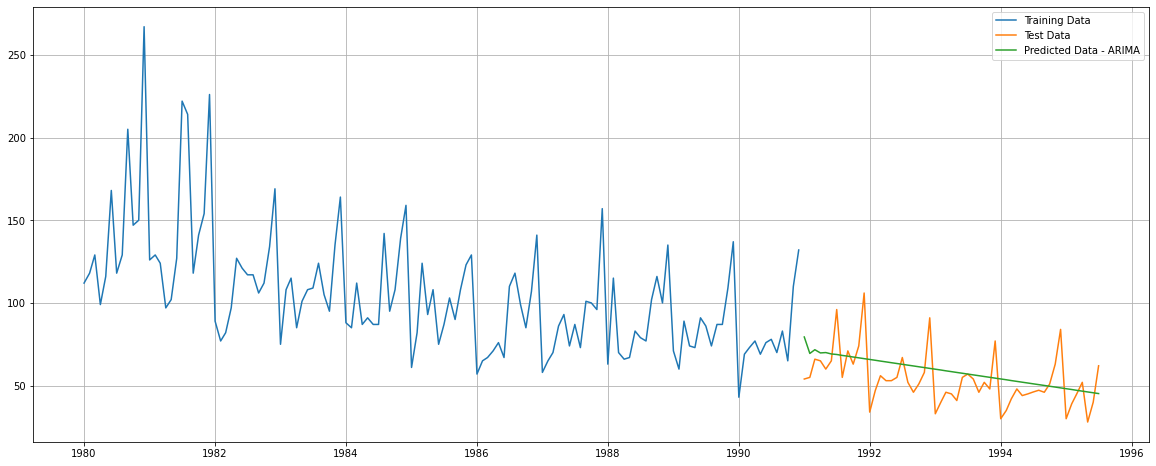

In [130]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model

Let us look at the ACF plot to understand the seasonal parameter for the SARIMA model.

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

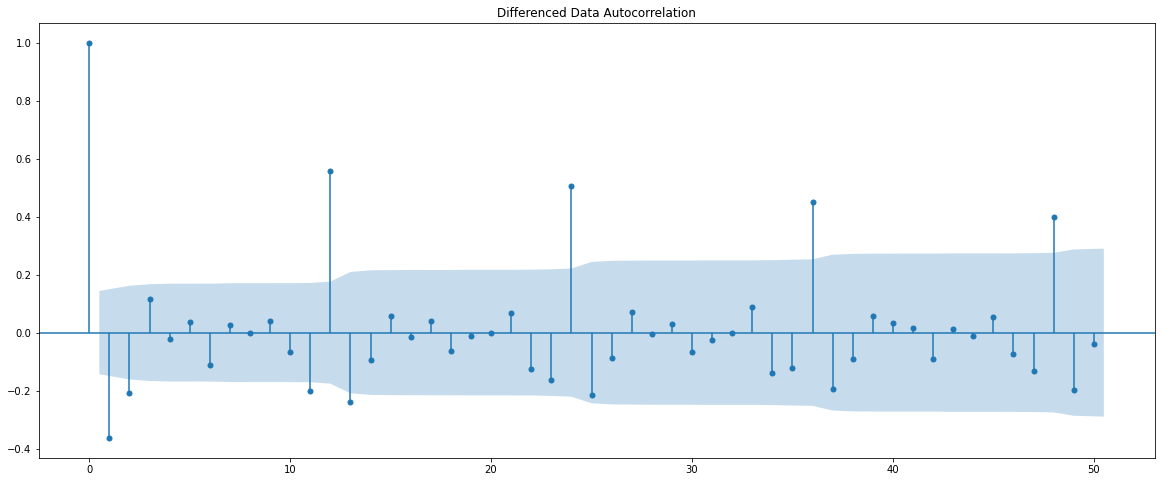

In [132]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality at 12.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.¶

In [133]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [134]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [135]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375
SARIMA(0, 1, 2)x(0, 0, 0,

In [136]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.903048
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [137]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -446.366
Date:                            Sun, 25 Jul 2021   AIC                            906.732
Time:                                    17:15:52   BIC                            925.243
Sample:                                         0   HQIC                           914.231
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1141      0.369     -0.310      0.757      -0.837       0.608
ma.L1         -0.6700    295.772   

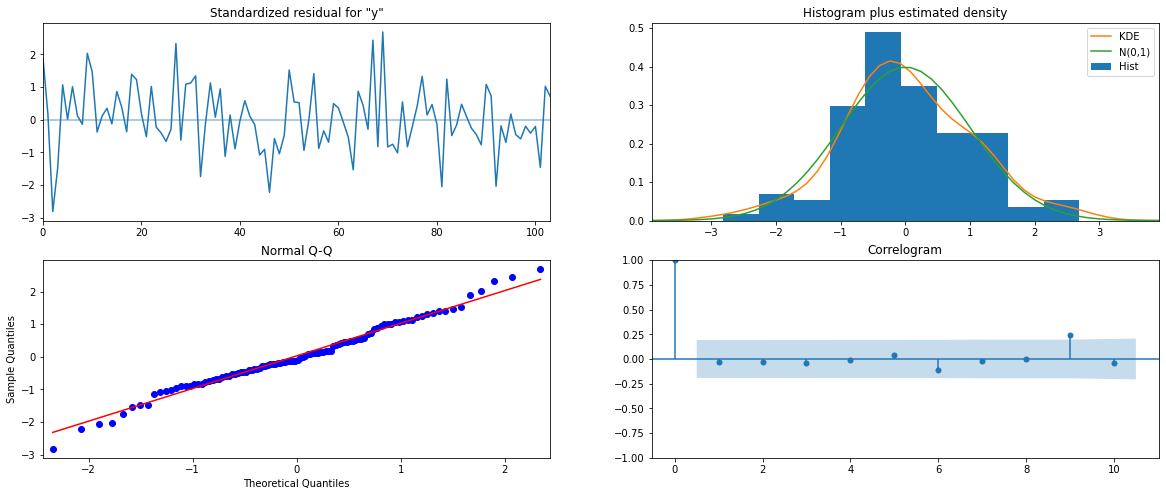

In [138]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [139]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [140]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,65.840866,17.399809,31.737866,99.943865
1,72.163496,17.834495,37.208529,107.118463
2,80.743308,17.834994,45.787363,115.699253
3,79.341165,17.835581,44.384069,114.298260
4,75.274330,17.835522,40.317349,110.231311


In [141]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print('RMSE of SARIMA model',rmse)

RMSE of SARIMA model 31.42979344641327


In [142]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475
Simple Average Model,53.413298


# Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

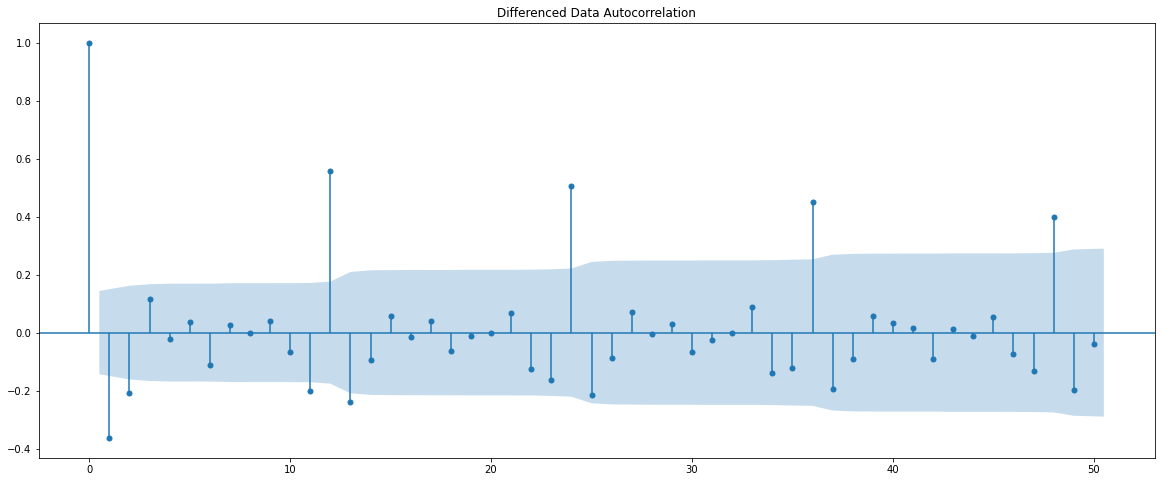

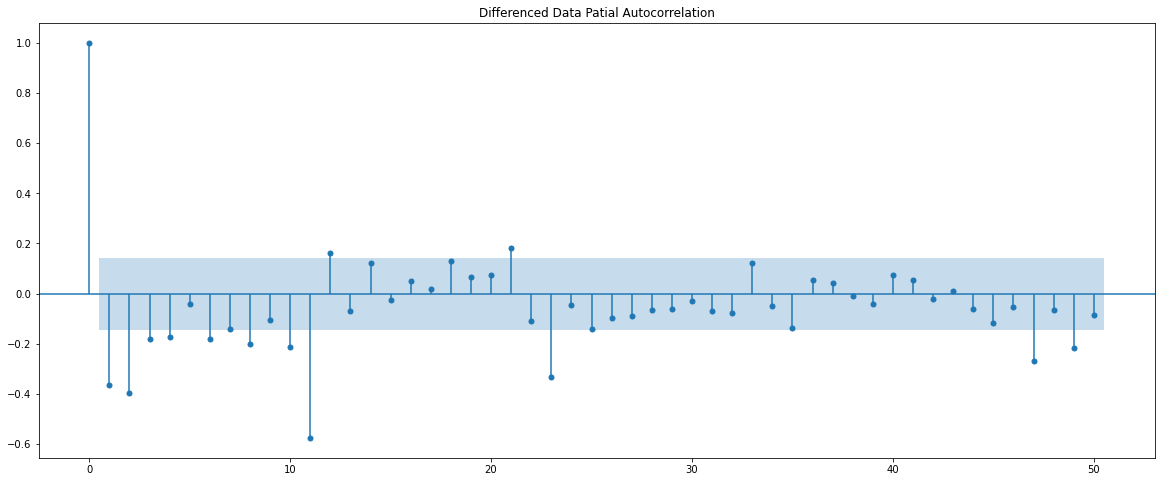

In [143]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()


Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [145]:
manual_ARIMA = ARIMA(train['Rose'],order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 25 Jul 2021   AIC                           1279.299
Time:                        17:15:53   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [146]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [147]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print('RMSE of manual ARIMA (2,1,2)',rmse)

RMSE of manual ARIMA (2,1,2) 15.342048385136696


In [148]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475
Simple Average Model,53.413298


# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

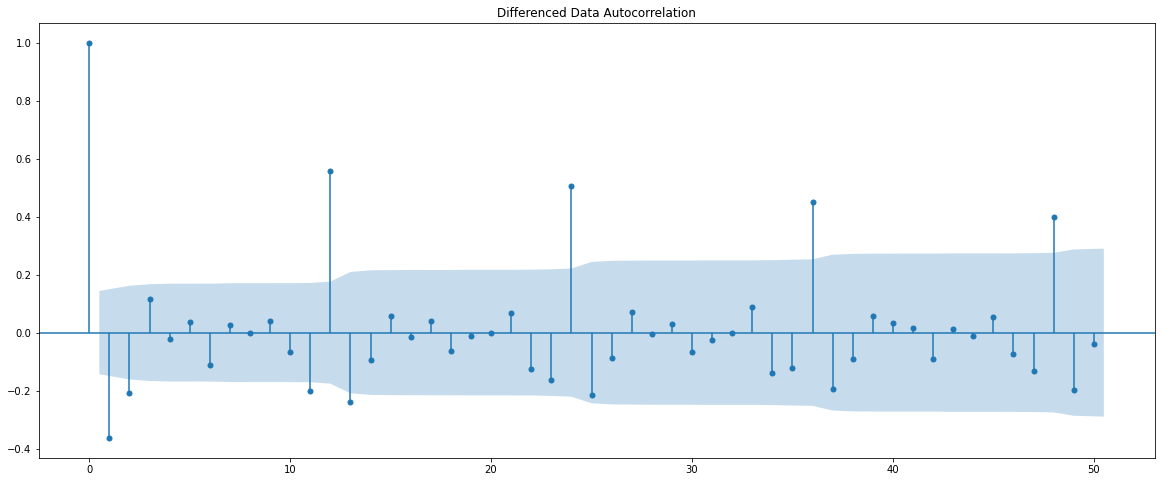

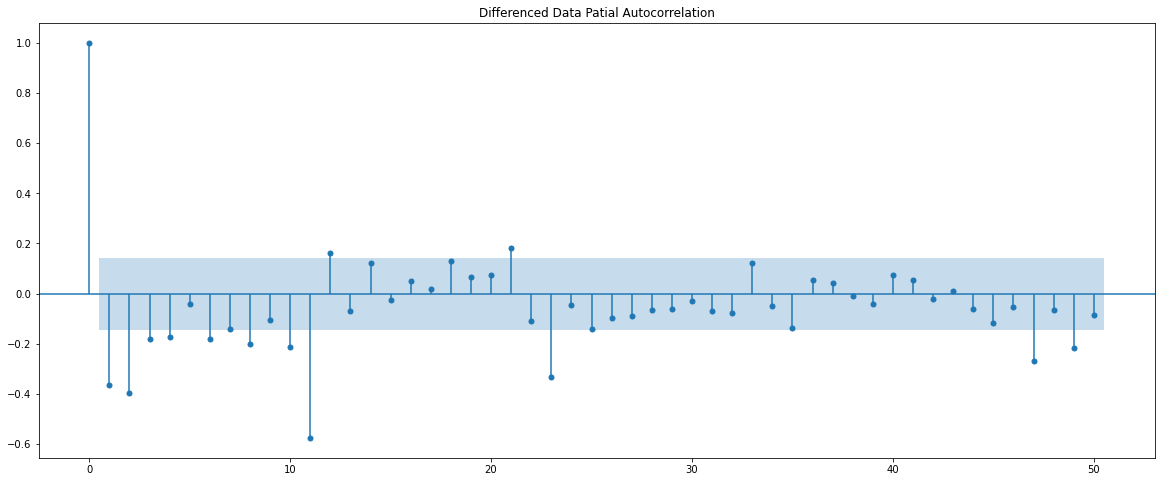

In [149]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

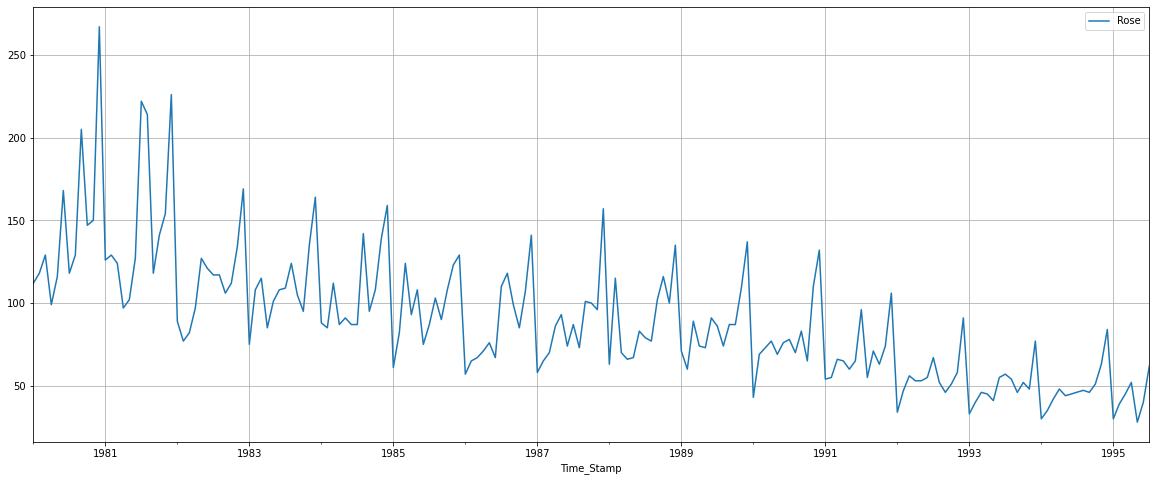

In [150]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series

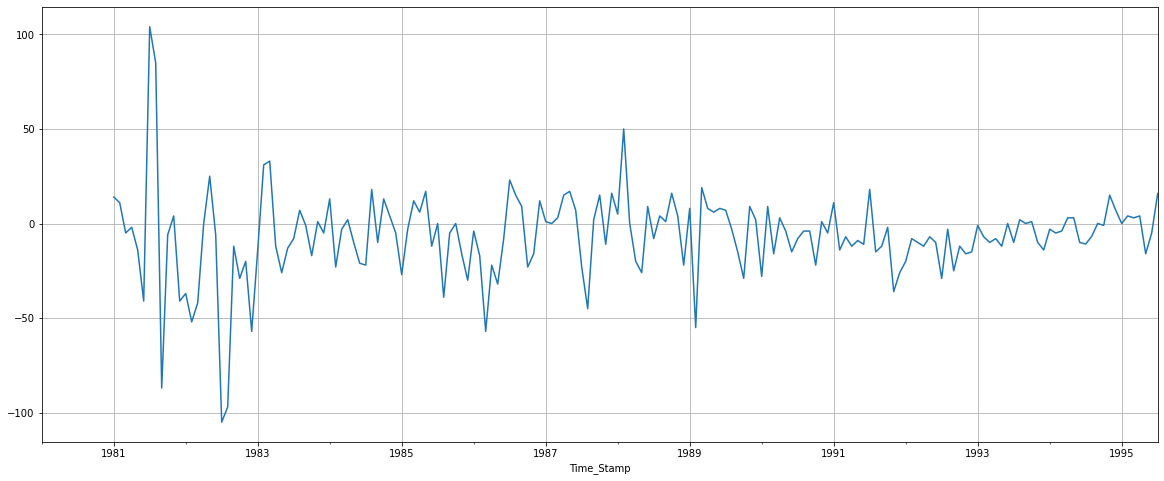

In [151]:
(df['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

<AxesSubplot:xlabel='Time_Stamp'>

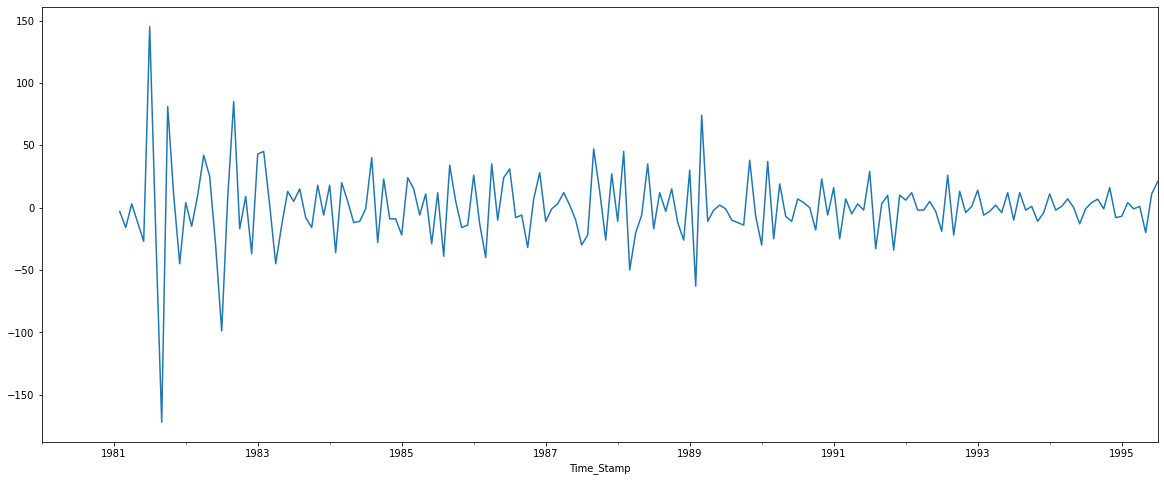

In [152]:
(df['Rose'].diff(12)).diff().plot()

Now we see that there is almost no trend present in the data. Seasonality is only present in the data

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

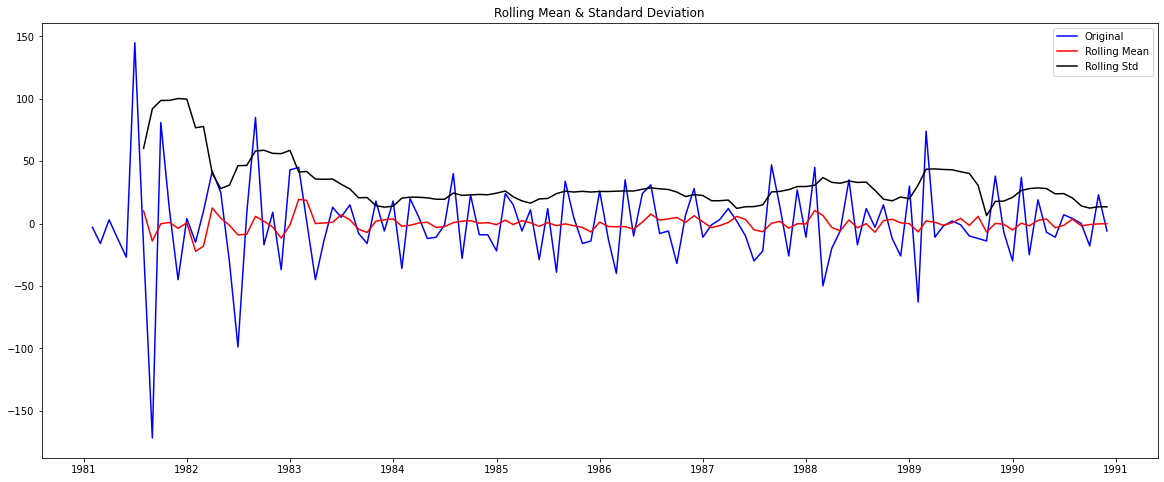

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [153]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

From the p-value we see that the time series is stationary and now SARIMA can be applied to the dataset

Checking the ACF and the PACF plots for the new modified Time Series.

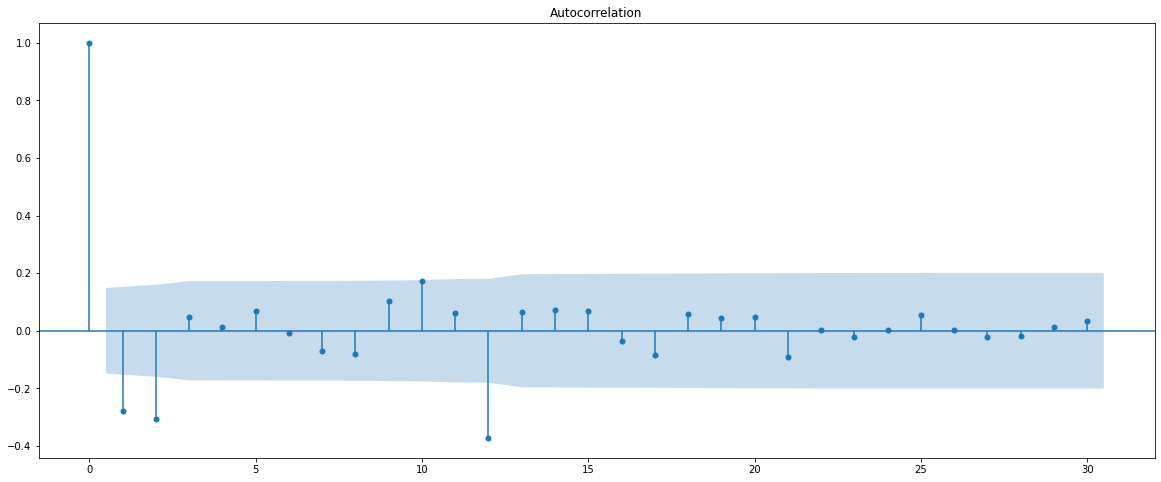

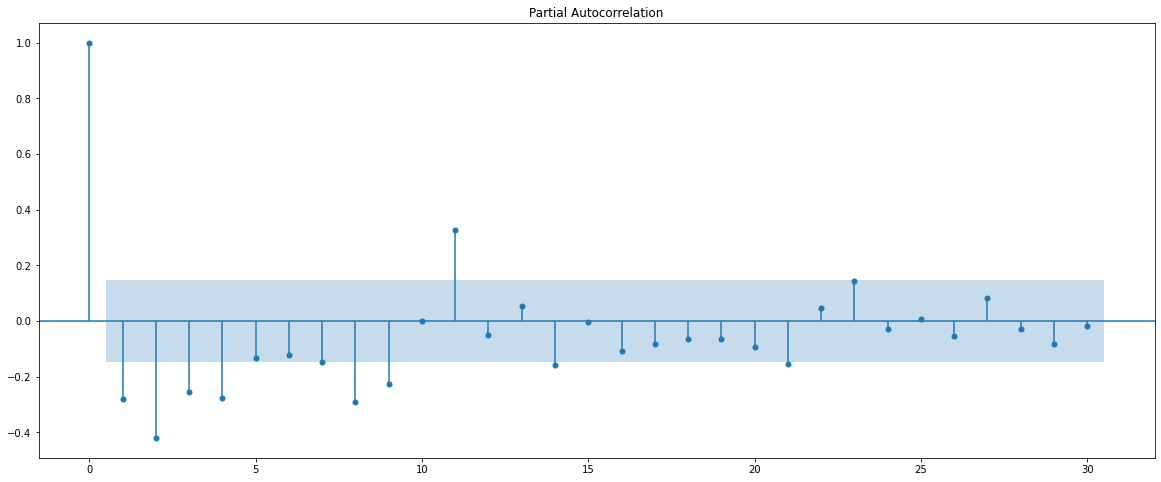

In [154]:
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(2) and q(2) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

In [155]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -416.314
Date:                                 Sun, 25 Jul 2021   AIC                            842.628
Time:                                         17:15:56   BIC                            855.345
Sample:                                              0   HQIC                           847.765
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0063      0.433      0.015      0.988      -0.842       0

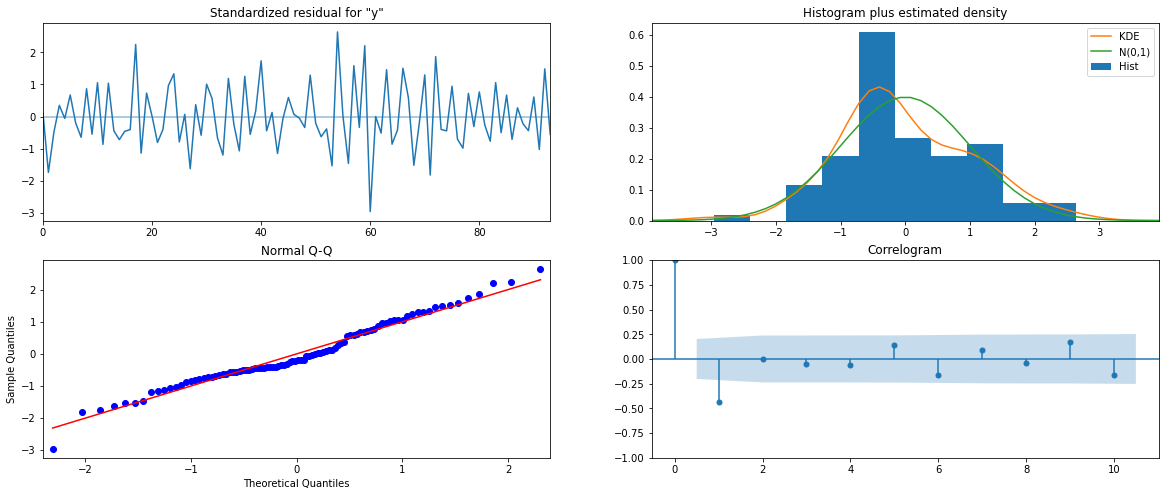

In [156]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

# Predict on the Test Set using this model and evaluate the model.

In [157]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [158]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,43.646159,19.534214,5.359803,81.932514
1,62.903694,27.610277,8.788545,117.018843
2,66.110162,33.809308,-0.154865,132.375189
3,63.052288,39.036025,-13.456915,139.561492
4,64.965757,43.641187,-20.569397,150.500911


In [159]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print('RMSE Manual SARIMA',rmse)

RMSE Manual SARIMA 15.004343981604407


In [160]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475
Simple Average Model,53.413298


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [161]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -647.280
Date:                            Sun, 25 Jul 2021   AIC                           1308.559
Time:                                    17:15:58   BIC                           1330.042
Sample:                                01-01-1980   HQIC                          1317.283
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7666      0.088     -8.755      0.000      -0.938      -0.595
ma.L2         -0.1381      0.081   

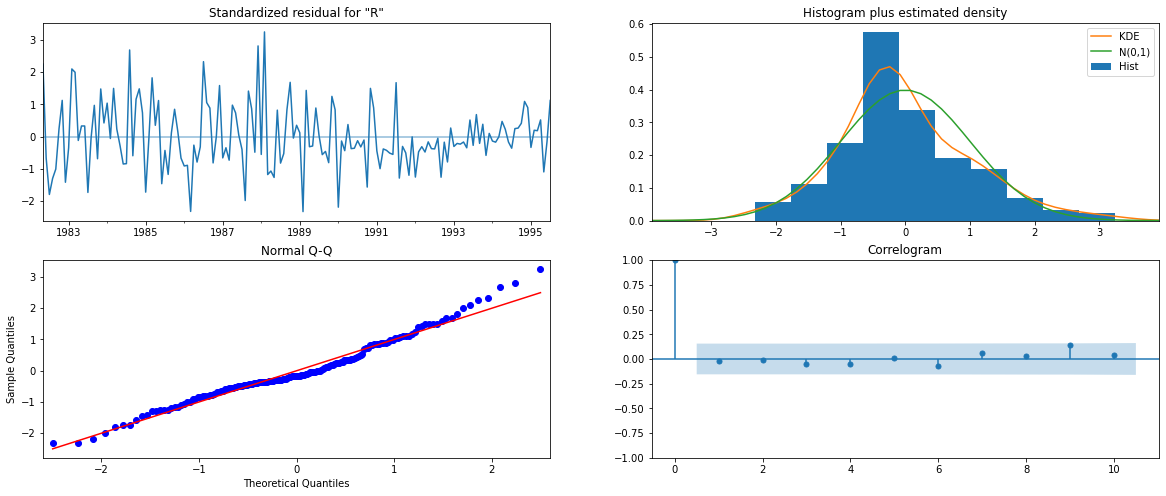

In [162]:
results_full_data_model.plot_diagnostics();

# Evaluate the model on the whole and predict 12 months into the future with appropriate confidence intervals/bands.

In [163]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=17)

In [164]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,48.046587,14.109226,20.393012,75.700162
1995-09-01,44.148055,14.488472,15.751172,72.544938
1995-10-01,47.266525,14.550800,18.747481,75.785570
1995-11-01,52.579129,14.612863,23.938444,81.219813
1995-12-01,69.663528,14.674663,40.901717,98.425338


In [165]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 27.67120666670762


In [166]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Full Model SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Alpha = 0.09 SES,36.748402
"Alpha=1.49e-08,Beta = 1.665e-10 DES",15.255480
"Alpha=0.088,Beta=9e-06,,Gamma=0.0003 TES",14.222850
"Alpha=0.11,Beta=0.049,Gamma=0.36 TES_AM",19.337756
Alpha=0.07 Tuned SES,36.387162
"Alpha=0.04,Beta=0.47 Tuned DES",14.455710
"Alpha=0.1,Beta=0.4,Gamma=0.3 Tuned TES",11.986168
Linear RegressionOnTime,15.255492
NaiveModel,79.672475
Simple Average Model,53.413298


In [167]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-12-31', freq='M'))

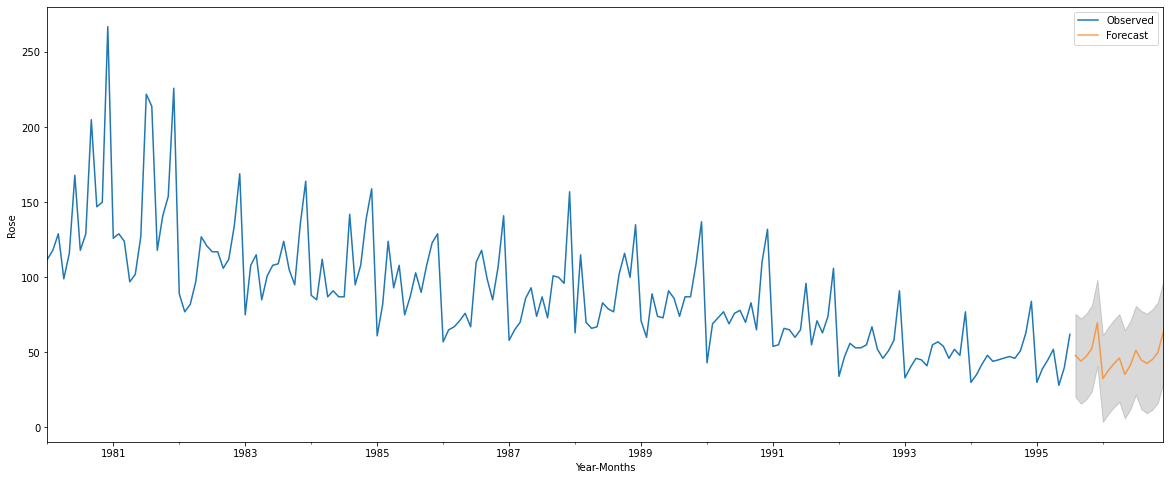

In [168]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()